In [112]:
import modin.pandas as pd     
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

from imblearn.over_sampling import SMOTE

In [85]:
data = pd.read_csv('archive/train.csv')
test = pd.read_csv('archive/test.csv')


In [86]:
data.head()

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
0,1,18,19,2853,29442,1386,2435,35,-999,3,...,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.00603,0.132353,0.139706,1
1,8,4,110,1986,13684,7189,-999,-999,17,3,...,-999.000000,-999.000000,0.070991,0.773966,0.019315,-999.000000,-999.00000,0.147059,0.106618,0
2,30,0,39,1019,10232,678,791,16,-999,3,...,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.000000,-999.00000,0.382353,0.242647,0
3,43,20,39,1751,2689,8235,1042,13,10,1,...,-999.000000,0.352379,0.044301,0.951564,0.023684,0.363370,0.00201,0.147059,0.132353,0
4,46,7,44,2262,29428,6031,304,16,-999,3,...,0.021226,0.226161,0.059125,0.906155,0.020733,-999.000000,-999.00000,0.455882,0.132353,1


In [92]:
data.isna().sum().sum()

0

<AxesSubplot:xlabel='y', ylabel='Count'>

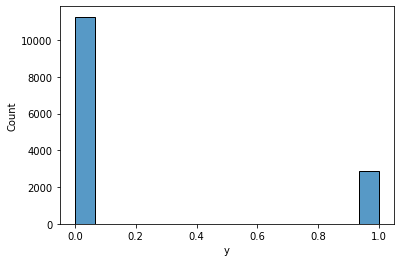

In [111]:
sns.histplot(x='y', data=data)

## Split test and training

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X = data.drop('y', axis=1)
y = data['y']

In [116]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

<AxesSubplot:xlabel='y', ylabel='Count'>

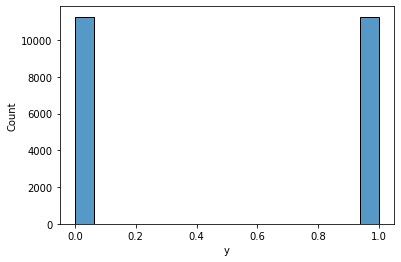

In [125]:
sns.histplot(data=y_resampled)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=42)

## Create Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [127]:
clf = LogisticRegression().fit(X_train, y_train)

In [128]:
from sklearn.metrics import classification_report, f1_score

In [129]:
y_pred = clf.predict(X_test)

In [130]:
f1_score(y_test, y_pred)

0.7388869026337742

In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77      4467
           1       0.81      0.68      0.74      4552

    accuracy                           0.76      9019
   macro avg       0.76      0.76      0.76      9019
weighted avg       0.76      0.76      0.76      9019



## Submission

In [132]:
sub_pred = clf.predict(test)

In [133]:
sub_pred.shape

(21183,)

In [134]:
df = pd.DataFrame()

In [135]:
df = pd.DataFrame(sub_pred, columns=['predicted'])

In [136]:
df = pd.concat([test['id'], df], axis=1)

In [137]:
df

,id,predicted
0,0,1
1,2,1
2,4,0
3,7,1
4,15,1
...,...,...
21178,35297,0
21179,35298,0
21180,35300,1
21181,35302,0


In [138]:
df.to_csv('submission/02.csv', index=False)